## FINAL PROJECT

### TELCO CHURN PREDICTION
#### SECTION 4 - FEATURE SELECTION AND MODEL DEPLOYMENT

Since using all of the features we find in the dataset might not be useful in building a machine learning model, mostly in order to make the necessary prediction, ***Feature Selection*** would play a huge role in building a machine learning model. Therefore the goal of this section is to select the best features possible for the previous selected model using two variations and finally deploy the model to Dashboard.

### IMPORTING LIBRARIES

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss
import statsmodels.api as sm
import pylab

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.model_selection import learning_curve, ValidationCurve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold , cross_val_score

from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco-Customer-Churn-Clean.csv').drop(columns=['customerID'])

In [3]:
df['Churn'] = df['Churn'].replace({0: 'no', 1:'yes'})

In [4]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,no
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,yes


### FEATURE SELECTION USING CORRELATION

> Correlation is an alternative method to select best features, it states how the features are related to each other or the target variable. This can be positive, meaning an increase in one value of feature increases the value of the target variable or negative, meaning an increase in one value of feature decreases the value of the target variable.

In [5]:
df_corr = df.copy()

In [6]:
df_corr.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,no
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,yes


In [7]:
df_corr['Churn'] = df_corr['Churn'].replace({'no' : 0, 'yes' : 1})

In [8]:
df_corr_cat = df_corr.loc[:, df_corr.dtypes == np.object]
df_corr_con = df_corr.loc[:, df_corr.dtypes != np.object]

In [9]:
df_corr_cat.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [10]:
df_corr_con.head()

,Tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


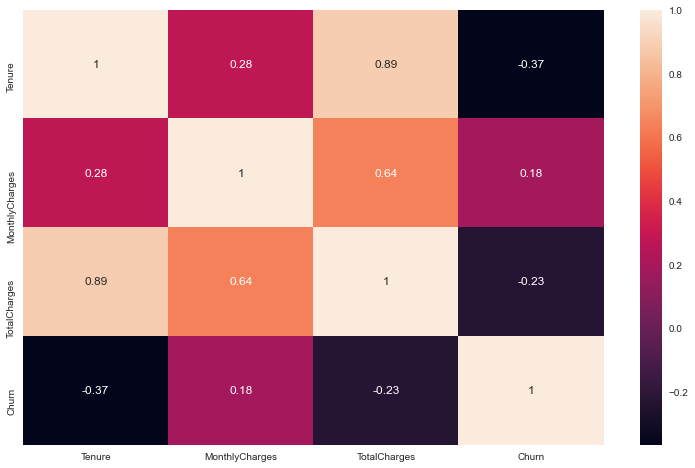

In [11]:
# Spearman for measuring correlation between continous feature

plt.figure(figsize = (13,8))
sns.heatmap(df_corr_con.corr('spearman'), annot = True)
plt.show()

> Basically, any of these features are somewhat correlated to the target. However the correlation still not significant.

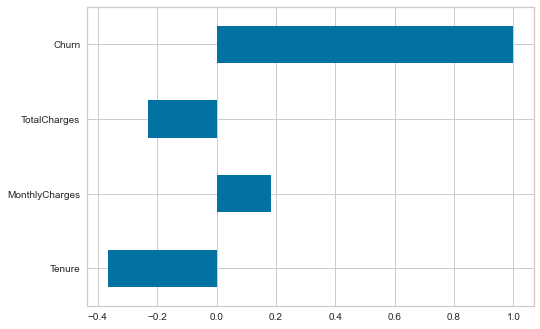

In [12]:
df_corr_con.corr('spearman')['Churn'].plot(kind = 'barh')

> From plot above, we can also infer that the higher the Total Charges are, the less likely for people to churn, it would also apply to Tenure.

In [13]:
pd.DataFrame(df_corr_con.corr('spearman')['Churn'])

,Churn
Tenure,-0.367062
MonthlyCharges,0.184743
TotalCharges,-0.229955
Churn,1.000000


> Now to the categorical features.

In [14]:
# CramersV for measuring correlation between categorical features. 

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

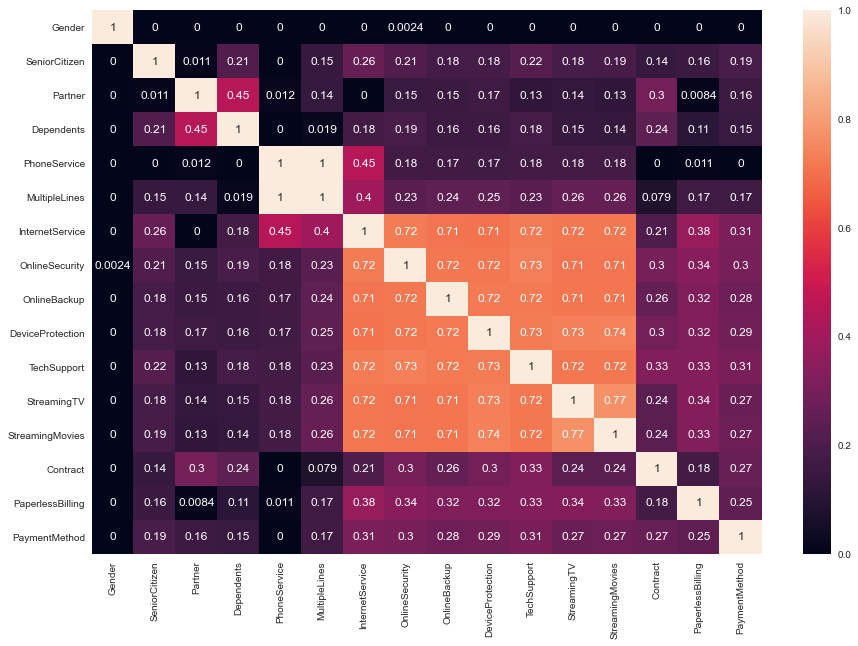

In [15]:
corr = []

for i in df_corr_cat:
    mat = []
    for j in df_corr_cat:
        mat.append(cramers_v(df_corr_cat[i],df_corr_cat[j]))
    corr.append(mat)
    
cramers = pd.DataFrame(corr, index = df_corr_cat.columns, columns = df_corr_cat.columns)
plt.figure(figsize = (15,10))
sns.heatmap(cramers,annot = True)
plt.show()

> As we can see that there are many features highly correlated to each other, we will narrow it down below.

In [16]:
col = []
res = []
for cols in df_corr_cat:
    result = cramers_v(df_corr_cat[cols], df['Churn'])
    col.append(cols)
    res.append(result)
    n = {'columns' : col,
         'values' : res}

In [17]:
cr = pd.DataFrame(n)
cr.loc[cr['values'] > 0.2].sort_values(by = 'values', ascending = False).head(7)

,columns,values
13,Contract,0.409798
7,OnlineSecurity,0.347016
10,TechSupport,0.342526
6,InternetService,0.322037
15,PaymentMethod,0.302677
8,OnlineBackup,0.291850
9,DeviceProtection,0.281095


> Alright so we get all we need using correlation method, let's sum it up.

In [18]:
df_feat = df[['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineBackup', 
              'DeviceProtection', 'MonthlyCharges', 'Tenure', 'TotalCharges', 'Churn']]

In [19]:
df_feat.head()

,Contract,OnlineSecurity,TechSupport,InternetService,PaymentMethod,OnlineBackup,DeviceProtection,MonthlyCharges,Tenure,TotalCharges,Churn
0,Month-to-month,No,No,DSL,Electronic check,Yes,No,29.85,1,29.85,no
1,One year,Yes,No,DSL,Mailed check,No,Yes,56.95,34,1889.50,no
2,Month-to-month,Yes,No,DSL,Mailed check,Yes,No,53.85,2,108.15,yes
3,One year,Yes,Yes,DSL,Bank transfer (automatic),No,Yes,42.30,45,1840.75,no
4,Month-to-month,No,No,Fiber optic,Electronic check,No,No,70.70,2,151.65,yes


> Now that we've got our top features, let's get it labelled.

In [20]:
df_lab = df_feat.loc[:, df_feat.dtypes == np.object]
df_scl = df_feat.loc[:, df_feat.dtypes != np.object]

In [21]:
for i in df_scl :
    df_scl[i] = MinMaxScaler().fit_transform(df[[i]])

In [22]:
df_lab = pd.get_dummies(df_lab, drop_first = True)
df_feat = pd.concat([df_lab, df_scl], axis=1).rename(columns = {'Churn_yes' : 'Churn'})

In [23]:
df_feat.head()

,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,Churn,MonthlyCharges,Tenure,TotalCharges
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.115423,0.013889,0.003437
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.385075,0.472222,0.217564
2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0.354229,0.027778,0.012453
3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0.239303,0.625000,0.211951
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0.521891,0.027778,0.017462


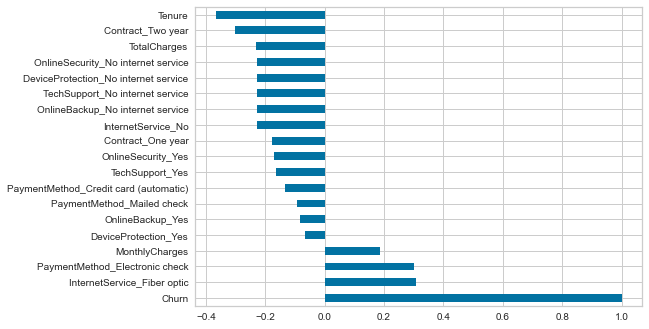

In [24]:
df_feat.corr('spearman')['Churn'].sort_values(ascending = False).plot(kind= 'barh')

> We can see by the plot above, that some variables have might a positive relation to our target variable - Churn, while in plot below, some have negative relation. Positive relation meaning that the likeness of customer's churn increases by those vaiables, while in contrary, negative relation means that likeliness of churn decreases by that variable.

> As mentioned in EDA, by having a one to two years contract along with tenure have the most negative relation with churn. Having DSL internet service also reduces the proability of churn. Lastly, total charges, monthly contracts, fiber optic internet services can lead to higher churn rates. This is interesting, although fiber optic services are actually faster, customers are likely to churn because of it.

### FEATURE IMPORTANCE USING RECURSIVE FEATURE ELIMINATION

> The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [25]:
X = df_feat.drop(['Churn'], axis = 1)
y = df_feat['Churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 42)

In [27]:
# Select best feature

model = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10)
rfe = RFE(model, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes

print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True False  True False False  True False False  True False  True
 False  True False  True  True  True]
[1 1 5 1 4 3 1 2 8 1 9 1 7 1 6 1 1 1]


Index(['Contract_One year', 'Contract_Two year', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'MonthlyCharges', 'Tenure',
       'TotalCharges'],
      dtype='object')

In [28]:
feat_col = X_train.columns[rfe.support_].tolist()
feat_tgt = pd.DataFrame(df_feat['Churn'])

In [29]:
df_feat2 = pd.concat([df_feat[feat_col], feat_tgt], axis=1)

In [30]:
df_feat2.head()

,Contract_One year,Contract_Two year,OnlineSecurity_Yes,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No internet service,DeviceProtection_No internet service,MonthlyCharges,Tenure,TotalCharges,Churn
0,0,0,0,0,1,0,0,0.115423,0.013889,0.003437,0
1,1,0,1,0,0,0,0,0.385075,0.472222,0.217564,0
2,0,0,1,0,0,0,0,0.354229,0.027778,0.012453,1
3,1,0,1,0,0,0,0,0.239303,0.625000,0.211951,0
4,0,0,0,1,1,0,0,0.521891,0.027778,0.017462,1


> We've got our best feature using this method. For the last method, I'll be using Tree Based Classifier to select best features.

### FEATURE IMPORTANCE USING TREE BASED CLASSIFIER

> Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features. And it's one of the best feature selection technique out there. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[0.03402597 0.044205   0.00554795 0.0270406  0.00690355 0.02765342
 0.04906492 0.00566441 0.01157775 0.03548909 0.00993141 0.00882555
 0.02198575 0.00778897 0.02125748 0.22533215 0.20929552 0.24841051]


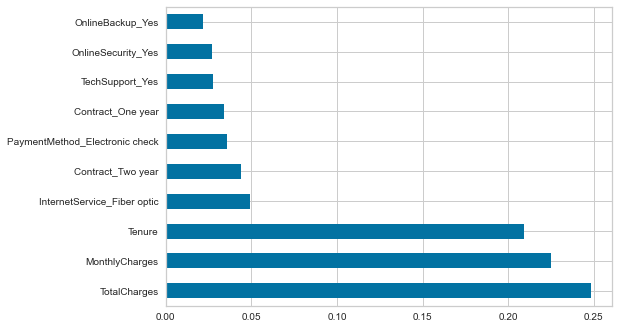

In [31]:
# feature importances using Tree Based Classifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [32]:
feat_col2 = feat_importances.nlargest(10).index.tolist()
feat_tgt2 = pd.DataFrame(df_feat['Churn'])

In [33]:
df_feat3 = pd.concat([df_feat[feat_col2], feat_tgt2], axis=1)

In [34]:
df_feat3.head()

,TotalCharges,MonthlyCharges,Tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,Contract_One year,TechSupport_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,Churn
0,0.003437,0.115423,0.013889,0,0,1,0,0,0,1,0
1,0.217564,0.385075,0.472222,0,0,0,1,0,1,0,0
2,0.012453,0.354229,0.027778,0,0,0,0,0,1,1,1
3,0.211951,0.239303,0.625000,0,0,0,1,1,1,0,0
4,0.017462,0.521891,0.027778,1,0,1,0,0,0,0,1


> We've got our top features using this much simpler technique, in the end whichever method we choose, we still kinda get the same output. Therefore let's try to build the model and see the performances.

### MODEL PREPARATION

In [35]:
df_new = df_feat3.copy()

In [36]:
# splitting target 

X = df_new.drop(columns = ['Churn'])
y = df_new['Churn'].values

In [37]:
# Split train data

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = .8, random_state = 42)

# Model Best Parameter

LRG = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train, y_train)

In [38]:
# train model score

LRG_score_tr = LRG.score(X_train,y_train)

# test model score

LRG_score = LRG.score(X_test,y_test)

In [39]:
test_score = pd.DataFrame({'Train': [LRG_score_tr],
                          'Test' : [LRG_score]})
test_score

,Train,Test
0,0.792155,0.806955


### CROSS VALIDATION AND MODEL EVALUATION

> Before going further, I'll check for overfitting using Kfold cross validation.

In [40]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)

LRG_kfold = cross_val_score(LRG, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG_kfold.tolist()})

,LRG Kfold cross-val
0,0.795918
1,0.783496
2,0.785271
3,0.799468
4,0.782416


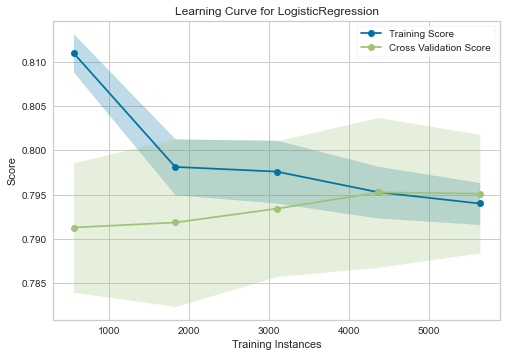

In [41]:
learning_curve(LRG, X, y, scoring='accuracy')
plt.show()

> From above plot, there are no overfitting. Model scores are stable.

In [42]:
# Predict using Logistic Regression

yp_LRG = LRG.predict(X_test)

In [43]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.85      0.90      0.87      1036
     Churned       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



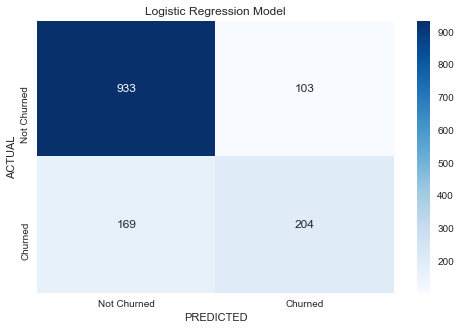

In [44]:
# Model evaluation

print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_LRG), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Model')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> It would seems that using these features are causing a reduction on our Precision performances. Although it's good enough, but I'll try to add more variables, and see if the performances can be increased.

### FEATURE IMPORTANCE - PART 2

In [45]:
df_new2 = df_feat.copy()

In [46]:
# splitting target 

X = df_new2.drop(columns = ['Churn'])
y = df_new2['Churn'].values

[0.03048187 0.04055612 0.00491744 0.0284032  0.00513127 0.02701608
 0.05324677 0.00643988 0.01252774 0.03835535 0.01075027 0.00593371
 0.02315529 0.00712796 0.02110272 0.22640585 0.20714457 0.25130392]


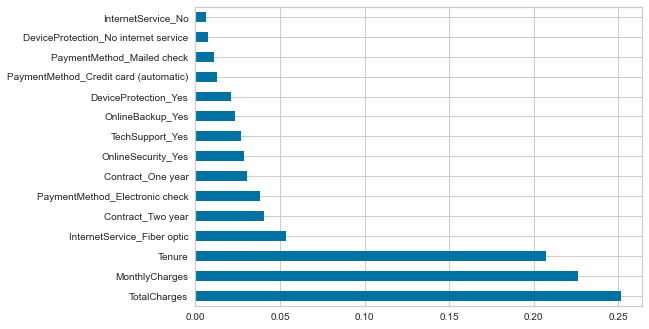

In [47]:
# feature importances using Tree Based Classifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.show()

In [48]:
feat_col3 = feat_importances.nlargest(15).index.tolist()
feat_tgt3 = pd.DataFrame(df_new2['Churn'])

In [49]:
df_feat4 = pd.concat([df_new2[feat_col3], feat_tgt3], axis=1)

In [50]:
df_feat4.head()

,TotalCharges,MonthlyCharges,Tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,Contract_One year,OnlineSecurity_Yes,TechSupport_Yes,OnlineBackup_Yes,DeviceProtection_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,DeviceProtection_No internet service,InternetService_No,Churn
0,0.003437,0.115423,0.013889,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.217564,0.385075,0.472222,0,0,0,1,1,0,0,1,0,1,0,0,0
2,0.012453,0.354229,0.027778,0,0,0,0,1,0,1,0,0,1,0,0,1
3,0.211951,0.239303,0.625000,0,0,0,1,1,1,0,1,0,0,0,0,0
4,0.017462,0.521891,0.027778,1,0,1,0,0,0,0,0,0,0,0,0,1


> We've successfullt adding more features.

### MODELLING - PART 2

In [51]:
df_new3 = df_feat4.copy()

In [52]:
# splitting target 

X = df_new3.drop(columns = ['Churn'])
y = df_new3['Churn'].values

In [53]:
# Split train data

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = .8, random_state = 42)

# Model Best Parameter

LRG = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train, y_train)

In [54]:
# train model score

LRG_score_tr = LRG.score(X_train,y_train)

# test model score

LRG_score = LRG.score(X_test,y_test)

In [55]:
test_score = pd.DataFrame({'Train': [LRG_score_tr],
                          'Test' : [LRG_score]})
test_score

,Train,Test
0,0.79393,0.809794


### CROSS VALIDATION AND MODEL EVALUATION - PART 2

In [56]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)

LRG_kfold = cross_val_score(LRG, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG_kfold.tolist()})

,LRG Kfold cross-val
0,0.797693
1,0.779947
2,0.791482
3,0.800355
4,0.792185


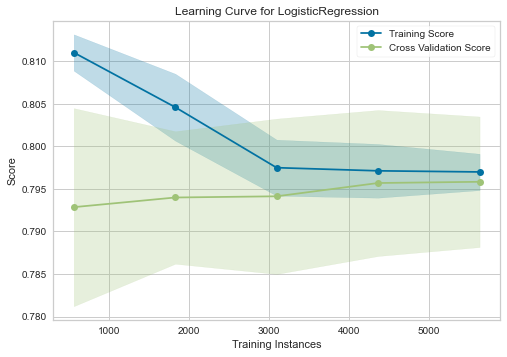

In [57]:
learning_curve(LRG, X, y, scoring='accuracy')
plt.show()

> Using cross validation, there would seems that there are no overfitting or undefitting problem.

In [58]:
# Predict using Logistic Regression

yp_LRG = LRG.predict(X_test)

In [59]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.85      0.90      0.87      1036
     Churned       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



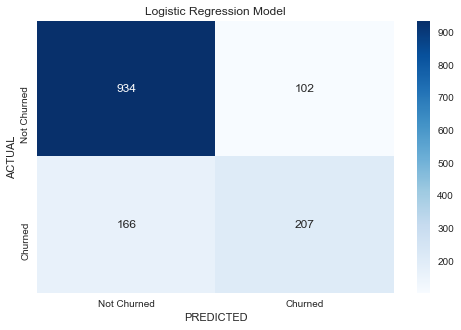

In [60]:
# Model evaluation

print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_LRG), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Model')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> So it would seems that there are slight changes on the model performances if we add more features into it. But I think it's not neccessary, as the increase would only yield by 0,01. Therefore I think we better choose the previous one.

### MODEL TESTING AND DEPLOYMENT

In [61]:
# splitting target 

X = df_new.drop(columns = ['Churn'])
y = df_new['Churn'].values

In [62]:
# Split train data

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = .8, random_state = 42)

# Model Best Parameter

LRG = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train, y_train)

In [63]:
model = LRG

> Let's try to predict the data using Logistic Regression Model that we've picked. I'll try to pick it randomly from our data.

In [64]:
df_new.head()

,TotalCharges,MonthlyCharges,Tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,Contract_One year,TechSupport_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,Churn
0,0.003437,0.115423,0.013889,0,0,1,0,0,0,1,0
1,0.217564,0.385075,0.472222,0,0,0,1,0,1,0,0
2,0.012453,0.354229,0.027778,0,0,0,0,0,1,1,1
3,0.211951,0.239303,0.625000,0,0,0,1,1,1,0,0
4,0.017462,0.521891,0.027778,1,0,1,0,0,0,0,1


In [65]:
df_new.loc[df_new['Churn']==0].tail()

,TotalCharges,MonthlyCharges,Tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,Contract_One year,TechSupport_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,Churn
7037,0.163435,0.028856,1.000000,0,1,0,0,0,0,0,0
7038,0.229194,0.662189,0.333333,0,0,0,1,1,1,0,0
7039,0.847792,0.845274,1.000000,1,0,0,1,0,0,1,0
7040,0.039892,0.112935,0.152778,0,0,1,0,0,1,0,0
7042,0.788101,0.869652,0.916667,1,1,0,0,1,1,0,0


In [66]:
df_new.loc[df_new['Churn']==1].tail()

,TotalCharges,MonthlyCharges,Tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,Contract_One year,TechSupport_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,Churn
7021,0.083802,0.413433,0.166667,0,0,1,1,1,0,0,1
7026,0.046443,0.258209,0.125000,0,0,0,0,0,0,0,1
7032,0.008722,0.572139,0.013889,1,0,1,0,0,0,0,1
7034,0.792908,0.842786,0.930556,1,0,0,0,0,1,1,1
7041,0.035303,0.558706,0.055556,1,0,0,0,0,0,0,1


In [67]:
df_noch = df_new.loc[df_new['Churn']==0].tail().drop(columns = ['Churn'], axis = 1).T
df_chrn = df_new.loc[df_new['Churn']==1].tail().drop(columns = ['Churn'], axis = 1).T

In [68]:
# Predict Not Churned

for i in df_noch :
    model = LRG
    df_noch[i] = df_noch[i].ravel().tolist()
    pred = round(model.predict_proba([df_noch[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 0.73%
Customer Not Churned - Probability is 11.5%
Customer Not Churned - Probability is 12.04%
Customer Not Churned - Probability is 25.99%
Customer Not Churned - Probability is 2.85%


> Well it seems that this model could correctly predict all of the Not Churned customers as the probability of Churn is still below 50%. Let's try to predict the Churned customers.

In [69]:
# Predict Churned

for i in df_chrn :
    model = LRG
    df_chrn[i] = df_chrn[i].ravel().tolist()
    pred = round(model.predict_proba([df_chrn[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 22.27%
Customer Not Churned - Probability is 30.62%
Customer Churned     - Probability is 71.8%
Customer Not Churned - Probability is 19.15%
Customer Churned     - Probability is 59.48%


> As we can see, out of five predictions, this model only predicted right about two times. This would seems be caused by the somewhat low recall, I'll try to tweak it one more time to see if this problem still persist.

### OVERSAMPLING - SMOTE

In [70]:
# Oversampling with SMOTE

X_train_sm, y_train_sm = SMOTE(random_state = False).fit_sample(X_train, y_train)

# Model Best Parameter oversampled

LRG_sm = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train_sm, y_train_sm)

In [71]:
# Predict using Logistic Regression oversampled

yp_LRG_sm = LRG_sm.predict(X_test)

              precision    recall  f1-score   support

 Not Churned       0.92      0.71      0.80      1036
     Churned       0.51      0.82      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409



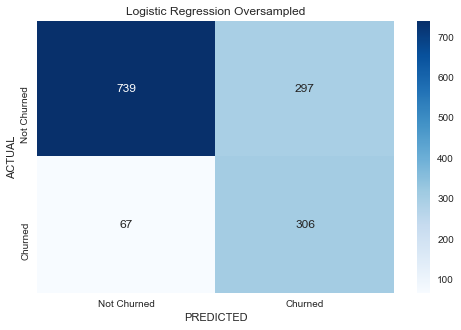

In [72]:
# Model evaluation

print(classification_report(y_test, yp_LRG_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_LRG_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> The oversampling technique would rather varying overall performances. Although it greatly increasing the Precision on Not Churned, and Recall on Churned, but would make the other lowers. But for now let's continue to see if this is the better model than before.

In [73]:
model_sm = LRG_sm

In [74]:
# Predict Not Churned

for i in df_noch :
    model = LRG_sm
    df_noch[i] = df_noch[i].ravel().tolist()
    pred = round(model.predict_proba([df_noch[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 1.39%
Customer Not Churned - Probability is 25.95%
Customer Not Churned - Probability is 31.81%
Customer Not Churned - Probability is 45.81%
Customer Not Churned - Probability is 6.42%


> As we can see above, although using a rather *balanced* data with oversampling technique that would seems to increasing the Recall of Churned, but at the same time, it greatly lowers the performance of this model predict the Not Churned. But seeing result abpve, we can see that this model prediction are still stable.

In [75]:
# Predict Churned

for i in df_chrn :
    model = LRG_sm
    df_chrn[i] = df_chrn[i].ravel().tolist()
    pred = round(model.predict_proba([df_chrn[i]])[0][1]*100, 2)
    if pred > 50 :
        print(f'Customer Churned     - Probability is {pred}%')
    else :
        print(f'Customer Not Churned - Probability is {pred}%')

Customer Not Churned - Probability is 42.18%
Customer Churned     - Probability is 55.74%
Customer Churned     - Probability is 87.35%
Customer Not Churned - Probability is 44.63%
Customer Churned     - Probability is 80.36%


> As expected that this model are going better to predict Churned customer. But in conclusion, we can say that although it increasing this point by a significant amount, the *balanced* version of this model might just lowering the overall model performances - Accuracy. But as this far, I would choose this version instead as I think it's rather balanced in predicting both sides.

In [76]:
LRG_sm_tr = LRG_sm.score(X_train,y_train)
LRG_sm_ts = LRG_sm.score(X_test,y_test)
print(f'train score : {LRG_sm_tr} || test score : {LRG_sm_ts}')

train score : 0.7312744053958111 || test score : 0.7416607523066004


> By the scoring above, I think this oversampled model is somewhat stable. There are no sign of overfitting. I'll try to prove it by using kfold.

In [77]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
LRG_sm_kfold = cross_val_score(LRG_sm, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG SMOTE Kfold cross-val' : LRG_sm_kfold.tolist()})

,LRG SMOTE Kfold cross-val
0,0.806738
1,0.789007
2,0.774823
3,0.797872
4,0.769094
5,0.799290
6,0.797513
7,0.804618
8,0.774423
9,0.793961


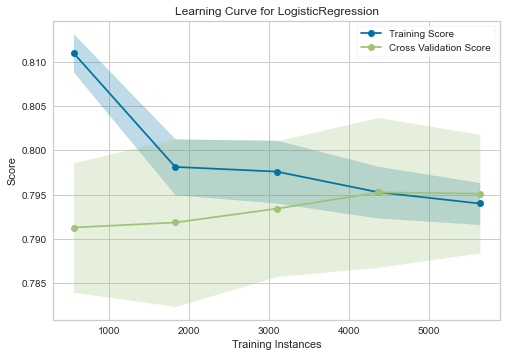

In [78]:
learning_curve(LRG_sm, X, y, scoring='accuracy')
plt.show()

> The kfold proves that there are no drastic differences between this and previous scores. Therefore we can conclude that there are no overfitting on model. Then finally we'll dump this model with *joblib* to apply it later into the dashboard to complete this project.

              precision    recall  f1-score   support

 Not Churned       0.92      0.71      0.80      1036
     Churned       0.51      0.82      0.63       373

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409



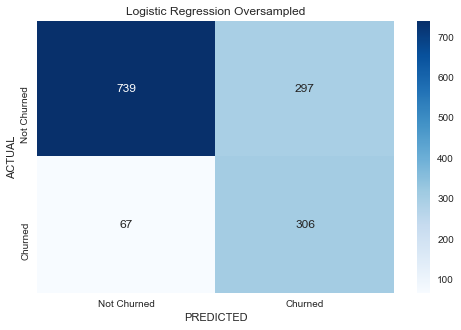

In [79]:
print(classification_report(y_test, yp_LRG_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_LRG_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression Oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [80]:
joblib.dump(model_sm, 'model_LRG')

['model_LRG']

### EXPORTING DATA INTO DASHBOARD

In [81]:
df_dash = pd.read_csv('Telco-Customer-Churn-Clean.csv').drop(columns = 'customerID', axis =1)

In [82]:
df_dash_cat = df_dash.loc[:, df_dash.dtypes == np.object]
df_dash_con = df_dash.loc[:, df_dash.dtypes != np.object]

In [83]:
df_dash_cat = pd.get_dummies(df_dash_cat, drop_first = True)

In [84]:
df_dash = pd.concat([df_dash_cat, df_dash_con], axis=1)

In [85]:
df_dash.head()

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,45,42.30,1840.75,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1


In [86]:
df_dash.to_csv('df_dash.csv')